In [1]:
import json
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
def get_data():
    with open('../../storage/arxiv-metadata-oai-snapshot.json', 'r') as input_file:
        for line in input_file:
            yield json.loads(line)

In [3]:
data = list(get_data())

In [4]:
len(data)

2258347

In [5]:
data[0]

{'id': '0704.0001',
 'submitter': 'Pavel Nadolsky',
 'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
 'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
 'comments': '37 pages, 15 figures; published version',
 'journal-ref': 'Phys.Rev.D76:013009,2007',
 'doi': '10.1103/PhysRevD.76.013009',
 'report-no': 'ANL-HEP-PR-07-12',
 'categories': 'hep-ph',
 'license': None,
 'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from th

In [6]:
ct = Counter([cat.split('.')[0] for entry in data for cat in entry['categories'].split()])
print(ct)

Counter({'math': 807073, 'cs': 753711, 'cond-mat': 455236, 'astro-ph': 384561, 'physics': 281229, 'hep-ph': 171753, 'hep-th': 158294, 'quant-ph': 134965, 'stat': 127510, 'gr-qc': 100049, 'math-ph': 74232, 'eess': 68738, 'nucl-th': 54260, 'hep-ex': 50377, 'q-bio': 47571, 'nlin': 43515, 'hep-lat': 26707, 'nucl-ex': 24337, 'q-fin': 20800, 'econ': 7925, 'chao-dyn': 2398, 'q-alg': 1578, 'alg-geom': 1423, 'solv-int': 1413, 'cmp-lg': 894, 'dg-ga': 732, 'patt-sol': 650, 'adap-org': 584, 'funct-an': 427, 'mtrl-th': 262, 'chem-ph': 251, 'comp-gas': 221, 'supr-con': 175, 'atom-ph': 123, 'acc-phys': 49, 'plasm-ph': 38, 'ao-sci': 17, 'bayes-an': 16})


In [7]:
category_mapping = {
    'math': 'math',
    'physics': 'ph',
    'cs': 'cs',
    'astro-ph': 'ph',
    'cond-mat': 'ph',
    'hep-ph': 'ph',
    'hep-th': 'ph',
    'quant-ph': 'ph',
    'stat': 'math',
    'gr-qc': 'ph',
    'math-ph': 'ph',
    'eess': 'cs',
    'nucl-th': 'ph',
    'hep-ex': 'ph',
    'q-bio': 'bio',
    'nlin': 'ph',
    'hep-lat': 'ph',
    'nucl-ex': 'ph',
    'q-fin': 'soc',
    'econ': 'soc',
    'chao-dyn': 'ph',
    'q-alg': 'soc',
    'alg-geom': 'math',
    'solv-int': 'math',
    'cmp-lg': 'cs',
    'dg-ga': 'math',
    'patt-sol': 'ph',
    'adap-org': 'ph',
    'funct-an': 'math',
    'mtrl-th': 'chem',
    'chem-ph': 'chem',
    'comp-gas': 'chem',
    'supr-con': 'ph',
    'atom-ph': 'ph',
    'acc-phys': 'ph',
    'plasm-ph': 'ph',
    'ao-sci': 'bio',
    'bayes-an': 'math'
}

In [8]:
filtered_data = []
for entry in data:
    filtered_data.append(
        {
            'text': entry['abstract'],
            'cat': [category_mapping[cat.split('.')[0]] for cat in entry['categories'].split()]
        }
    )

In [9]:
filtered_data[0]

{'text': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD processes at the LHC, showing\nthat enhanced sensitivity to the signal can be obtained with judicious\nselection of ev

In [10]:
ct = Counter([cat for entry in filtered_data for cat in entry['cat']])

print(ct)

Counter({'ph': 1963532, 'math': 938594, 'cs': 823343, 'bio': 47588, 'soc': 30303, 'chem': 734})


In [22]:
abstract_lengths = [len(entry['text'].split()) for entry in filtered_data]

In [23]:
sorted_abstract_lengths = Counter(abstract_lengths)

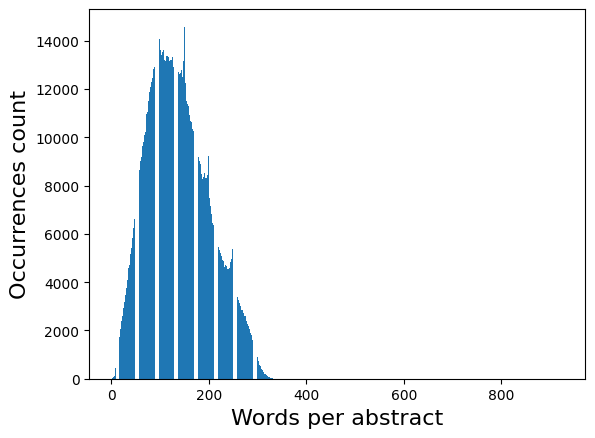

In [24]:
plt.bar(sorted_abstract_lengths.keys(), sorted_abstract_lengths.values())
plt.xlabel("Words per abstract", fontsize=16)  
plt.ylabel("Occurrences count", fontsize=16)
plt.show()

In [25]:
for entry in filtered_data:
    if len(entry['text'].split()) < 10:
        print(entry['text'])

  This is a supplement to the paper arXiv:q-bio/0701050, containing the text of
correspondence sent to Nature in 1990.

  No abstract given; compares pairs of languages from World Atlas of Language
Structures.

  In this contribution we go through the developments that in the years 1968 to
1974 led from the Veneziano model to the bosonic string.

  We prove a duality theorem for certain graded algebras and show by various
examples different kinds of failure of tameness of local cohomology.

  Description of a polynomial time reduction of SAT to 2-SAT of polynomial
size.

  We prove the existence of global Bishop discs in a strictly pseudoconvex
Stein domain in an almost complex manifold of complex dimension 2.

  This paper has been withdrawn by the authors.

  An critical overview of the current state of research in turbulence in
astrophysical disks.

  The paper presents a survey of mathematical problems, techniques, and
challenges arising in the Thermoacoustic and Photoacoustic Tomo

  The authors survey recent results in special functions, particularly the
gamma function and the Gaussian hypergeometric function.

  A survey on algorithms for computing discrete logarithms in Jacobians of
curves over finite fields.

  In this note we construct infinitely many distinct simply connected Stein
fillings of a certain infinite family of contact 3--manifolds.

  This submission has been removed because 'G. Forst' is an apparent pseudonym,
in violation of arXiv policies.

  Lagrangian relaxation has been used extensively in the design of
approximation algorithms. This paper studies its strengths and limitations when
applied to Partial Cover.

  In the paper we describe basin of attraction and the Siegel discs of the
$p$-adic dynamical system $f(x)=x^{2n+1}+ax^{n+1}$ over complex $p$-adic field.

  We study self-consistent cosmological solutions for an Einstein universe in a
graph-based induced gravity model. Especially, we demonstrate specific results
for cycle graphs.

  W

  In this paper we study the Hilbert scheme of smooth, linearly normal, special
scrolls under suitable assumptions on degree, genus and speciality.

  We propose a new method to apply the Lipschitz functional calculus of local
Dirichlet forms to Poisson random measures.

  We study multiplicative Diophantine approximation property of vectors and
compute Diophantine exponents of hyperplanes via dynamics.

  We discuss the charge conjugation quantum number for tetraquarks or
meson-meson molecules, seen as possible interpretations of the newly found
$XYZ$ charmonium-like resonances.

  This article is devoted to some foundational questions of resurgent analysis
as applied to the Schr\"odinger equation in one dimension.

  A semiotic model of the user interface in human-computer interaction.
Algorithmic sign, semotics, algorithmic art.

  Documents early computer art in the Soviet bloc and describes Marxist art
theory.

  The groupoid attached to the action of PSL(2,Z) on the irrational re

  We prove that Khovanov homology and Lee homology with coefficients in
$\mathbb{F}_2$ are invariant under component-preserving link mutations.

  Finite simple groups of Lie type as expanders

  In this paper, we establish the Hyers--Ulam--Rassias stability of ring
homomorphisms and ring derivations on fuzzy Banach algebras.

  The present status of kaon photo- and electroproduction on the nucleon is
briefly reviewed. Some current important issues in this field are discussed.

  We classify all the possible $delta$-vectors of d-dimensional integral convex
polytopes whose volumes are less than or equal to 3/(d!).

  Repeated unbiased measurements cause a continual application of the weak
causality principle, leading to an apparent arrow of time for
continuously-monitored quantum systems.

  In this paper, we discuss the asymptotic stability of singular steady states
of the nonlinear heat equation in the weighted Lebesgue norms.

  Reply to the comment [arXiv:0904.2989] on "Self-Diffusi

  We give an example showing that the Kobayashi-Royden pseudometric for a
non-taut domain is, in general, not the derivative of the Lempert function.

  Conway's second largest simple group, $\Co_2$, is characterized by the
centralizer of an element of order 3 and certain fusion data.

  A survey of dictionary models and formats is presented as well as a
presentation of corresponding recent standardisation activities.

  We prove that a weak solution of a slightly supercritical fractional Burgers
equation becomes Holder continuous for large time.

  In this article we prove a Howe correspondence for a family of
representations of sl(2n), which was introduced by Benkart, Britten, and
Lemire.

  By using the Fermi satellite, a group of physicists discovers a new type of
gamma-ray active nucleus

  This lecture reviews the classification of simple modules of double affine
Hecke algebras via the K-theory of Steinberg varieties of affine type

  We describe the Monte Carlo event generator f

  Dirac's contributions to the discovery of non-relativistic quantum mechanics
and quantum electrodynamics, prior to his discovery of the relativistic wave
equation, are described.

  In this paper, we will prove that the 2-category (2-SGp) of symmetric
2-groups and 2-category ($\cR$-2-Mod) of $\cR$-2-modules(\cite{5}) have enough
projective objects, respectively.

  The elimination of the non-transversal field in the standard light-cone
formulation of higher-dimensional extended objects is formulated as a
Hamiltonian reduction.

  In this paper we determine explicitly the mod-p essential cohomology ideals
of the p-groups with a cyclic subgroup of index p.

  An introduction to all the key ideas of Lazic's proof of the theorem on the
finite generation of adjoint rings.

  We propose a conjecture on integrality property of the open-closed mirror
maps of compact Calabi-Yau manifolds. Some examples are presented.

  In this paper we give a new proof for an almost isometry theorem in
Alexa

  BP is an E_4 ring spectrum. The E_4 structure is unique up to automorphism.

  In this paper, a new lemma is proved and inequalities of Simpson type are
established for co-ordinated convex functions and bounded functions.

  We discuss some statistical results on the evolution of magnetic CP stars in
the framework of the supposition about their binary nature.

  I give a short review of the current status of lattice QCD calculations of
the spectrum of charmonium.

  The paper has been withdrawn by the author due to a crucial error.

  We extend Dragomir's refinement of Jensen's inequality from the dicrete to
the general case, identifying the equality conditions.

  This is a cornucopia of types of algebras with some of their properties from
the operadic point of view.

  This paper has been withdrawn due to an incorrect analysis in Section 4.

  This paper has been withdrawn by the author due to a crucial sign error in
equation 1.

  In this paper we study the quantum wave packet and

  We reply to recent criticisms of the SIMPLE project by J.I. Collar
[arxiv:1106.3559]

  This paper describes the structure of singular codimension one foliations
with numerically trivial canonical bundle on projective manifolds.

  This paper has been withdrawn.

  We study spacelike hypersurfaces in anti-De Sitter spacetime that evolve by
the Lagrangian angle of their Gau\ss\ maps.

  We give a maximum principle proof of interior derivative estimates for the
K\"ahler-Ricci flow, assuming local uniform bounds on the metric.

  This article reviews recent work on the Kac master equation and its low
dimensional counterpart, the Kac equation.

  We indicate a C-Fuchsian counter-example to the result with the above title
announced at
http://www.maths.dur.ac.uk/events/Meetings/LMS/2011/GAL11/program.pdf and prove
a stronger statement.

  In this note we study a complex Monge-Amp\`{e}re type equation of the form
(dd^cu)^n = \frac {ke^{-u}dV}{\int e^{-u}dV}\,

  We show that Lusztig's $a$-f

  We give a simple proof of the so called reproducing kernel thesis for Hankel
operators

  Family of equations, which is the generalization of the $K(m,m)$ equation, is
considered. Periodic wave solutions for the family of nonlinear equations are
constructed.

  In this work we show how the Multiplicity Polar Theorem can be used to
calculate Chern numbers for a collection of 1-forms.

  We give an explicit classification of the cominuscule parabolic subalgebras
of all complex simple finite dimensional Lie superalgebras.

  This is a review article on Lorenz knots.

  In this paper we give the characterization of Fuchsian groups acting on
quaternionic hyperbolic 2-space.

  Simple constructions are given for finite semifields that include as special
cases both old semifields and recently constructed semifields.

  Recent calculations have confirmed the belief that the ultraviolet behaviour
of N-extended supergravities improves with increasing N. We give a
comprehensive review.

  Five 

  We propose a simple proof of the vertical half-space theorem for Heisenberg
space.

  The aim of this paper is to classify compact, simply connected K\"ahler
manifolds which admit totally geodesic, holomorphic complex homothetic
foliation by curves.

  A simple and effective method for imaging through ground-level atmospheric
turbulence.

  No abstract: Hadron-hadron cross-sections at the beginning of the 1970s

  The purpose of this article is to show that on an open and dense set,
complete integrability implies the existence of symmetry.

  A comment on the paper by Lopez et al. [A. Lopez, Z. Z. Sun, and J.
Schliemann, Phys. Rev. B 85, 205428 (2012)].

  A new method presented for design of incoherent dictionaries.

  Mathematical aspects of the theory of interfaces in statistical mechanics are
discussed.

  Two theorems on the theory of cluster expansions for an abstract polymer
system are reported.

  An examples of the Ricci-flat metric associated with the equations of
Navier-St

  A capacitary analogue of the limiting weak type estimate of P. Janakiraman
for the Hardy-Littlewood maximal function of an L1-function is discovered.

  We prove that a compact Ptolemy space with many strong inversions that
contains a Ptolemy circle is Moebius equivalent to an extended Euclidean space.

  A Mellin transform representation is derived for the associated Legendre
functions of the first kind on the cut

  We create displaced number states, which are nonclassical generalizations of
coherent states, of a vibrational mode of a single trapped ion.

  We propose a slight weakening of the definitions of Artin monoids and Coxeter
monoids. We study one `infinite series' in detail.

  We study algebraic solutions of the Riccati equation.

  Paraphrasing Luciano Pavarotti on music, let me say: "Learning mathematics by
only reading about it is like making love by e-mail."

  We generalize certain arguments in Zariski's irregularity theorem on cyclic
multiple planes.

  Administrati

  We give a short proof of the main algebraic result of
\cite{zilber2006covers}, also known as the `thumbtack lemma'.

  We provide a new derivation of the Dirac equation which promptly generalizes
to higher spins. We apply this idea to spin-half Elko dark matter.

  Large neutrino telescopes can measure the neutrino-nucleon cross-section by
studying neutrino absorption in the Earth.

  We prove that the Diophantine problem for spherical quadratic equations in
free metabelian groups is solvable and, moreover, NP-complete

  We study the quantization of a free scalar field when the background metric
satisfies Einstein's equations and develops gravitational shock waves.

  Typical models with composite Higgs bosons are briefly reviewed. We also
introduce the isospin symmetric Higgs model recently proposed in Ref. 1.

  We prove the analog of the Kac conjecture for hard sphere collisions

  We show that the cylinder Z^{2n}(1):= B^2(1)\times \mathbb{R}^{2(n-1)} embeds
symplectically into B

  We present a constructive proof that all gauge invariant Lorentz scalars in
Electrodynamics can be expressed as a function of the quadratic ones.

  We present a short and completely elementary proof for a double sum studied
by Brent and Osburn in arXiv:1309.2795v2.

  We present simple examples of rational maps of the complex projective plane
with equal first and second dynamical degrees and no invariant foliation.

  In this paper, the embeddings between weighted local Morrey-type spaces and
weighted Lebesgue spaces are investigated.

  In this paper, we introduce a concept of an indicator energy of two close
levels in the perturbation.

  A fast fair solution for Reader-Writer Problem is presented.

  This note improves our above-mentioned recent work by effectively depressing
the adverse effect of the lever arm on attitude estimation.

  It is shown that for quasiregular maps of positive lower order the Julia set
coincides with the boundary of the fast escaping set.

  We define 

  We settle a question posed by Umehara and Yamada, which generalizes a
completeness lemma useful in differential geometry.

  Following the work of Friedman, Koerwien, Nies and Schlicht we positively
answer their question whether the Scott rank of Polish metric spaces is
countable.

  We continue our study of the free boundary regularity in the thin one-phase
problem and show that $C^{2,\alpha}$ free boundaries are smooth.

  A generalization of the notion of an $\infty$-category is presented, allowing
for ($\infty$-)cat(egorie)s that may have non-invertible higher morphisms.

  This presentation focuses on the automatic expansion of Arabic request using
morphological analyzer and Arabic Wordnet. The expanded request is sent to
Google.

  The convergence of partial sums and Ces\'aro means of negative order of
double Walsh-Fourier series of functions of bounded \ generalized variation is
investigated.

  This is a brief summary of prompt production of D mesons in pp and Pb-Pb
collision

  We describe a simple polynomial-time algorithm for the CDT problem that
relies on a construction of Barvinok.

  The subnormality for the sum of commuting subnormal operators does not
guarantee the existence of commuting normal extensions.

  We present a construction of the Steinberg representation admitting an
automatic pass to an infinite-dimensional limit.

  We study the question of when cyclic branched covers of knots admit taut
foliations, have left-orderable fundamental group, and are not L-spaces.

  The weighted fuzzy c-mean clustering algorithm and weighted fuzzy
c-mean-adaptive cluster number are extension of traditional fuzzy c-mean
Algorithm to stream data clustering algorithm.

  A method for creating 3D texture coordinates for a sequence of polygon meshes
with changing topology and vertex motion vectors.

  We obtained some upper bounds for the pseudocharacter of the space C(X,Y) at
a point f.

  A Comment on the Letter by C. R. Galley, Phys. Rev. Lett. 110, 174301 (2

  We present lifted linear relaxations of the OPF problem.

  The paper presents a general introduction to the astonishing method for
deriving probability approximations that was invented by Charles Stein around
50 years ago.

  We use various method to extract surface rotation periods of Kepler targets
exhibiting solar-like oscillations and compare their results.

  We transform Tutte-Grothedieck invariants thus also Tutte polynomials on
matroids so that the contraction-deletion rule for loops (isthmuses) coincides
with the general case.

  We prove that there are at most two possibilities for the base of a
Lagrangian fibration from a complex projective irreducible symplectic fourfold.

  We show that the non-commutative widths for flopping curves on smooth 3-folds
introduced by Donovan-Wemyss are described by Katz's genus zero Gopakumar-Vafa
invariants.

  This paper has been withdrawn by the author

  By suitable examples we illustrate an algorithm for composition of inverse
problem

  We categorify the Beilinson-Lusztig-MacPherson integral form of quantum sl(2)
specialized at a prime root of unity.

  Fundamental domains are found for functions defined by general Dirichlet
series and using basic properties of conformal mappings the Great Riemann
Hypothesis is studied.

  We show that certain cyclically pinched one-relator groups are residually
torsion-free nilpotent.

  Taylor's and Laurent's expansions of $G$-monogenic mappings taking values in
the algebra of complex quaternion are obtained and singularities of these
mappings are classified.

  This paper studies the set of orphans in certain Calkin-Wilf trees generated
by linear fractional transformations.

  This is a list of several open problems dealing mainly with univariate
polynomials.

  On the assumption of the Riemann hypothesis, we give explicit upper bounds on
the difference between consecutive prime numbers.

  The class of spherically symmetric Finsler metrics is studied and locally
dually flat and 

  Condensed-matter physics brings us quasiparticles that behave like massless
fermions.

  We give a short review of recent progress on the positive energy theorem in
general relativity, especially for spacetimes with nonzero cosmological
constant.

  The two-particle short-range correlation functions in rapidity, azimuthal
angle and transverse momentum, following from the decay of statistical clusters
are evaluated and discussed.

  We study singular Fano threefolds of type $V_{22}$.

  We relate the jumps of the signature function of a link to the roots of its
first nonzero higher Alexander polynomial.

  In this paper we prove the existence of countable branches of rotating
patches bifurcating from the ellipses at some implicit angular velocities.

  We show there is a solution operator to $\bar{\partial}$ which is bounded as
a map $W^{s}_{(0,1)}(\Omega)\cap\mbox{ker }\bar{\partial}\rightarrow
W^{s}(\Omega)$ for all $s\ge 0$.

  We present a recent result on the parameterized post-N

  A concise review of the double Higgs production channel at the LHC and at
future hadron and lepton machines is presented.

  We give a short proof of the fact that compact pluricanonical locally
conformally K\"ahler manifolds have parallel Lee form.

  In this survey, we discuss whether the complex projective space can be
characterized by its integral cohomology ring among compact complex manifolds.

  We present here a review of existing analytical methods to solve boundary
value problems of diffusion in media containing N non-overlapping inclusions.

  A simple method to calibrate UV-VIS spectrometer by means of single bubble
sonoluminescence is presented and tested.

  In this note we prove an inequality for t-geometric means that immediately
implies the recent results of Audenaert [2] and Hayajneh-Kittaneh [6].

  We show that smooth projective horospherical varieties with nef tangent
bundles are rational homogeneous spaces.

  In this paper, we construct compact embedded $\lambd

  The class of ordinary linear constant coefficient differential equations is
naturally embedded into a wider class by associating differential equations to
algebraic curves.

  I discuss puzzles that require thinking outside the box. I also discuss the
box inside of which many people think.

  In this note we answer two questions on quasi-Baer modules raised by Lee and
Rizvi in J.Algebra (2016).

  We prove that ZF+DC+"There are no mad families" is equiconsistent with ZFC.

  In this paper, we obtain new results on the covering radius and deep holes
for projective Reed-Solomon (PRS) codes.

  We study tightness properties and selective versions of separability in
bitopological function spaces endowed with set-open topologies.

  We describe the computation of tables of Hilbert modular forms of parallel
weight 2 over totally real fields.

  A description and annotation guidelines for the Yahoo Webscope release of
Query Treebank, Version 1.0, May 2016.

  In this reply we discuss defini

  We classify the stable solutions (positive or sign-changing, radial or not)
to the following nonlocal Lane-Emden equation: $(-\Delta)^s u=|u|^{p-1}u$ in
$\mathbb{R}^n$ for $2<s<3$.

  Planning to explore the beginning of the Universe? A lightweight introductory
guide to the theory of Inflation.

  A variation on the splitting principle

  We give a simple combinatorial proof that the rotation number for each
element in Thompson's group ${\bf T}$ is rational.

  These are lecture notes of the lecture on elementary celestial mechanics read
at Technische Universitaet Dresden, Dresden, Germany from 2000 till 2011.

  We prove a microlocal counterpart of categorical localization for Fukaya
categories in the setting of the coherent-constructible correspondence.

  We construct a Cauchy type formula on open subdomains of Riemann surfaces

  We prove quantum unique ergodicity for a subspace of the continuous spectrum
spanned by the degenerate Eisenstein Series on GL(n).

  A nontrivial insta

  Proceedings of the Workshop on High Performance Energy Efficient Embedded
Systems (HIP3ES) 2017. Stockholm, Sweden, January 25th. Collocated with HIPEAC
2017 Conference.

  We construct a finitely generated group that does not satisfy the generalized
Burghelea conjecture.

  C.Swartz' result on tensor product measures is reviewed with proofs from the
scratch.

  We revisit the Massey's method for rating and ranking in sports and
contextualize it as a general centrality measure in network science.

  We compute the (primary) equivariant Euler characteristics of the building
for the general linear group over a finite field.

  We make a list of finite simple groups whose group rings over a given field
are serial.

  In this paper we review the recent progress in the (indefinite) string
density problem and its applications to the Camassa--Holm equation.

  We study the relation between the size of $L(1,\chi)$ and the width of the
zero-free interval to the left of that point.

  In this 

  In this paper, we provide Algebraic-Coding necessary and sufficient
conditions for the Maximum Distance Separable Conjecture to hold.

  We study a homogenization question for stochastic divergence type operator

  In this thesis, we study connections between metric and combinatorial graphs
from a Dirichlet space point of view.

  We review how the (quantum) cluster algebra naturally emerges in the study of
four-dimensional $\mathcal{N}=2$ supersymmetric gauge theories.

  We show that a graded Lie algebra admits a Levi decomposition that is
compatible with the grading.

  We propose a new approximate series solution of the semiclassical Wigner
equation by uniformization of WKB approximations of the Schr\"odinger
eigenfunctions.

  Dynamics reduces the orthorhombicity of magnetic stripes in La_2CuO_4+y. The
measured stripe incommensuration can be used to determine the oxygen content of
the sample.

  Some Erd\H{o}s-Ko-Rado type extremal properties of families of vectors from
$\{-1,0,

  We prove a model theorem for factor maps between ergodic, infinite
measure-preserving systems.

  This is an invited review of Jean Bricmont's book "Making Sense of Quantum
Mechanics."

  The integrated massless vertex operator in an $AdS_5\times S^5$ background in
the pure spinor formalism is constructed in terms of superfields.

  We prove that the sum of the $\alpha$-invariants of two different Koll\'ar
components of a Kawamata log terminal singularity is less than $1$.

  We consider Dirichlet heat kernel $p_a^{(\mu)}(t,x,y)$ for the Bessel
differential operator $L^{(\mu)}=\frac{d^2}{dx^2}+\frac{2\mu+1}{2x}$,
$\mu\in\mathbb{R}$, in half-line $(a,\infty)$, $a>0$, and provide its
asymptotic expansions for $xy/t\rightarrow\infty$.

  We give (two) non additive languages for geometry via simple generalisations
of commutative rings.

  These are lecture notes of the course in infinity categories given in the
fall 2016 at Weizmann Institute.

  Index of H.E.S.S. conference proceedings 

  This overview of neutrino astronomy emphasizes observation of astrophysical
neutrinos by IceCube and interesting limits on Galactic neutrinos from IceCube
and ANTARES.

  A generalization of Mercer inequality for h-convex function is presented. As
application, a weighted generalization of triangle inequality is given.

  This is a critical reconsideration of the standard way of account for
Coulomb-nuclear interference in elastic scattering amplitude.

  We determine which complex abelian varieties can be realized as the
automorphism group of a smooth projective variety.

  This note outlines three intellectually distinct but not mutually exclusive
strategies for measuring partisan gerrymandering: partisan symmetry, efficiency
gap, and algorithmic sampling.

  We critically analyze the rationale of arguments from finetuning and
naturalness in particle physics and cosmology. Some other numerological
coincidences are also discussed.

  We derive a system of difference equations satisfie

  This note establishes several integral identities relating certain metric
properties of level hypersurfaces of Morse functions.

  In this article we give a Jensen-Rohrlich type formula for a certain class of
automorphic functions on the hyperbolic 3-space for the group
$\mathrm{PSL}_2(\mathcal{O}_K)$.

  We describe structure of locally finite groups of finite centraliser
dimension.

  In the present paper we study the existence of solutions for some nonlocal
problems involving Orlicz-Sobolev spaces. The approach is based on
sub-supersolutions.

  Defined by a single axiom, finite abstract simplicial complexes belong to the
simplest constructs of mathematics. We look at a a few theorems.

  In this paper, we give an overview of the different types of linac
accelerators, with special emphasis on their use for a hadron-therapy facility.

  In this paper, we give a complete topological, as well as geometrical
classification of closed 3-dimensional Lorentz manifolds admitting a noncompa

  We give a modern presentation of the Dundas-Goodwillie-McCarthy theorem
identifying relative K-theory and topological cyclic homology for nilpotent
ring extensions.

  We analyze nonlinear Schr\"odinger and wave equations whose linear part is
given by the renormalized Anderson Hamiltonian in two and three dimensional
periodic domains.

  In this paper, we obtain a complete list of all self-similar solutions of
inverse mean curvature flow in $\mathbb{R}^2$.

  We give asymptotic estimates of the variance of the number of integer points
in translated thin annuli in any dimension.

  I give a comment on arXiv:1802.01804v3 [hep-ph]

  We prove that the Chebyshev spline orthoprojectors are uniformly bounded on
$L^\infty$.

  We give a new and conceptually simple proof of the Rickman-Picard theorem for
quasiregular maps based on potential-theoretic methods.

  We study coherence of graph products and Coxeter groups and obtain many
results in this direction.

  We show that any polarized K3

  We give a new proof of Kiselman's minimum principle for plurisubharmonic
functions, based on Ohsawa-Takegoshi extension theorem.

  In this paper we construct gluing maps and cobordism maps for sutured
monopole Floer homology.

  We study existence of Hamilton cycles in connected Cayley graphs on
generalized dihedral groups

  We give a reformulation of the Lehmer conjecture about algebraic integers in
terms of a simple counting problem modulo p.

  The log canonical ring of a projective plt pair with the Kodaira dimension
two is finitely generated.

  Rationally convex topological embeddings of compact surfaces (closed or with
boundary) into $\mathbb{C}^2$ are constructed.

  We introduce superequivalence and superuniform spaces.

  We prove an invariance property of intersections of Kudla-Rapoport divisors
on a unitary Rapoport-Zink space.

  This is a comment on the preprint arXiv:1809.07771v2 by W. Ji and X.-G. Wen.

  We give finite axiomatizations for the varieties generated by

  In this article we derive some polynomial inequalities for Mertens functions.

  In this article, we present a new characterization of the completeness of a
partial metric space--which we call \textit{orbital characterization}-- using
fixed point results.

  This survey deals with the Cremona group via its subgroups.

  Invited contribution to the inaugural issue of {\em Physics Educator.}

  We study parabolic equations in variable H\"older spaces on domains of
Euclidean spaces. The existence and uniqueness of solutions is proved.

  Talk presented at the conference on representation theory and harmonic
analysis at Saclay, the talk presented the development in conformal field
theory since 1968

  There is an error in the main result.
  We provide an easy generalization to the irreducibility criterion in the
title.

  In this paper, we define Gaussian generalized Tetranacci numbers and as
special cases, we investigate Gaussian Tetranacci and Gaussian Tetranacci-Lucas
numbers with the

  We show that minimal models of log canonical pairs exist, assuming the
existence of minimal models of smooth varieties.

  There exists an infinite family of examples of subsets of $\mathbb{F}_q^2$
with $q^{4/3}$ elements whose distance sets are not the whole of
$\mathbb{F}_q$.

  In this paper, we describe all finite Wajsberg algebras of order n<=9.

  McKelvey and Palfrey (1995)'s monotone structural Quantal Response
Equilibrium theory may be misspecified for the study of monotone behavior.

  The following notes derive from review lectures on closed string field theory
given at the Galileo Galilei Institute for Theoretical Physics in March 2019.

  In this work, spectrum and asymptotics of eigenfunctions of a generalized
class of boundary value problems with a delay are obtained.

  We give an example of the failure of homogenization for a viscous
Hamilton-Jacobi equation with non-convex Hamiltonian.

  This paper describes an $\sim {\cal O}(n)$ pre-compute technique to speed up
t

  We prove a recent conjecture by Ulas on reducible polynomial substitutions.

  In this paper, we state and prove some congruence properties for the
trinomial coeficients, one of which is similar to the Wolstenholme's theorem.

  We construct small models of number fields and deduce a better bound for the
number of number fields of given degree and bounded discriminant.

  We establish the minimal model theory for $\mathbb Q$-factorial log surfaces
and log canonical surfaces in Fujiki's class $\mathcal C$.

  In this paper, we establish Anderson localization for a class of Jacobi
matrices associated with skew shifts on $\mathbb{T}^{d}$, $d\geq3$.

  We show that a subdirectly irreducible *-regular ring admits a representation
within some inner product space provided so does its ortholattice of
projections.

  It is proved that the Wedderburn Theorem on finite division rings implies
that all knots and links in the smooth 4-dimensional manifolds are trivial.

  We prove global well-pose

  We describe one.

  We review a selected history of anomalous resonance, cloaking due to
anomalous resonance, cloaking due to complementary media, and superlensing.

  We study unirationality and rationality of Fano threefolds of degree 18 over
nonclosed fields.

  In this paper, a $3$-Kenmotsu structure is defined on a $4n+1$ dimensional
manifold where such structure seems to be never studied before.

  Penrose tilings and Arabic Mathematical explorations. One single article
published in the 2010 HOM-SIGMAA publication by the Mathematical Association of
America.

  The abstract will be added in due course.

  The paper contains a description of the links of complex surface germ.

  We discuss various recent advances on weak forms of the Twin Prime
Conjecture.

  We resolve the issue of infrared divergences present in theories of light
scalar fields on de Sitter space.

  In this paper, we identify a class of solutions to multidimensional
difference equation with rational generating 

  In generalization of the classical Atiyah-Bott Poisson brackets on the moduli
spaces of surfaces we define quasi-Poisson brackets on the moduli spaces of
quasi-surfaces.

  In this paper, we discuss about some results on average of Fibonacci and
Lucas sequences that may be found in the OEIS code A111035.

  We prove a Thom isomorphism theorem for differential forms in the setting of
transverse Lie algebra actions on foliated manifolds and foliated vector
bundles.

  The present article is devoted to some examples of functions whose arguments
represented in terms of certain series of the Cantor type.

  We point out numerous inconsistencies and inappropriate statements in M.
Miyazaki and H. Hayano, Journal of Radiological Protection 37, 1 (2016).

  We show how positive unital linear maps can be used to obtain some bounds for
the eigenvalues of nonnegative matrices.

  We generalise to profinite groups some of our previous results on the
cohomology of pro-p groups of bounded sectional

  We prove Bloch's conjecture for numerical Campedelli surfaces with
fundamental group of order $9$.

  The purpose of this paper is to study a Markov type inequality for algebraic
polynomials in $L^p$ norm on two-dimensional cuspidal domains.

  We consider a one dimensional ballistic nearest-neighbor random walk in a
random environment. We prove an Erd\H{o}s-R\'enyi strong law for the
increments.

  We factorize three-dimensional terminal flops into a composition of
divisorial contractions to points and blowing-up smooth curves.

  This paper is a collection of lecture notes on modified gravity. Various
modified gravity models formulated within the Riemannian formalism are
discussed.

  In this paper we develop a pure algebraic method which provides an algorithm
for testing emptyness of a polyhedron.

  We characterize sampling and interpolating sets with derivatives in weighted
Fock spaces on the complex plane in terms of their weighted Beurling densities.

  We prove that the ratio

  We give experimental support for a conjecture of Louder and Wilton saying
that words of imprimitivity rank greater than two yield hyperbolic one-relator
groups.

  This article proposes a new filtering model for stationary Gaussian Markov
statistical experiments, given by diffusion-type difference stochastic
equations.

  We provide an alternative proof that the finite rational linear combination
of radicals, under certain constraint, are linearly independent over
$\mathbb{Q}$.

  We compare the notion of relative non-pluripolar products and that of density
currents on compact Kahler manifolds.

  We study polarised algebraic degenerations of Calabi-Yau manifolds. We prove
a uniform Skoda type estimate, and a uniform $L^\infty$-estimate for the
Calabi-Yau K\"ahler potentials.

  We compute the character table of
$\text{GL}_n(\mathbb{F}_q)\rtimes\!<\!\sigma\!>\!$, $\sigma$ being an order 2
exterior automorphism.

  This paper describes a novel SLAM (simultaneous localization and mappi

  We construct the fine moduli space of log abelian varieties, which gives a
compactification of the moduli space of abelian varieties.

  In this note we discuss the strong coupling issues inherent to the defining
requirement for the so-called Einsteinian Cubic Gravity and its
quasi-topological generalisations.

  This article is a reflection on the mathematical legacy of Professor Petr
Simon.

  Epistemological and sociological questions about ownership of mathematical
and scientific discoveries.

  We study powers of binomial edge ideals associated with closed and block
graphs.

  We prove that any large even Artin group is poly-free and that any even Artin
group based on a triangle graph is also poly-free.

  This note is my comment on Glenn Shafer's discussion paper "Testing by
betting", together with two online appendices comparing p-values and betting
scores.

  In this note we describe the embeddings of the Heisenberg group into the
Cremona group.

  We prove that the 7-strand 

  We give a survey on the different results involving the topological structure
of subsums of null sequences.

  We define the Mie-Gr\"{u}neisen form in five different ways, then demonstrate
their equivalence.

  S-Motzkin paths (bijective to ternary trees) and partial version of them are
calculated using only elementary methods from linear algebra.

  We report on a simple LEGO construction that can draw an ellipse by using the
concept of trammel of Archimedes.

  In this paper, we compute the sum of the Betti numbers for 6 of the 7
families of smooth Hilbert schemes over projective space.

  There are obtained few non-equidimensional analogues of the well-known
Theorem of Moser.

  We prove that the automorphism groups of Hopf manifolds are Jordan.

  Starting from the microscopic reduced Hartree-Fock equation, we derive the
nanoscopic linearized Poisson-Boltzmann equation for the electrostatic
potential associated with the electron density.

  In this thesis, I apply the Green-Griff

  We present the envelope of holomorphy of a classical truncated tube domain.

  We formulate Aubry-Mather theory for Hamiltonians/Lagrangians defined on
graphs and discuss its relationship with weak KAM theory developed in [24].

  In this article, we review the mathematical modeling for the vascular system.

  This version removed by arXiv administrators because the submitter did not
have the right to agree to the license at the time of submission

  In this work we present a survey of results on the problem of finding the
minimum cardinality of the support of eigenfunctions of graphs.

  We classify connected graphs $G$ whose binomial edge ideal is Gorenstein. The
proof uses methods in prime characteristic.

  We find all polyhedral graphs such that their complements are still
polyhedral. These turn out to be all self-complementary.

  In the present paper, we investigate the regularity and symmetry properties
of weak solutions to semilinear elliptic equations which are locally stab

  A complex function is associated to each bounded linear operator

  A bijection is given between multi-edge trees and 3-coloured Motzkin paths.

  Accelerating Entrepreneurial Decision-Making Through Hybrid Intelligence
DESIGN PARADIGMS AND PRINCIPLES FOR DECISIONAL GUIDANCE IN ENTREPRENEURSHIP

  We count the number of elements in the set $$G_{3}(n,x) = \{M \in
GL_3(\mathbb{Z}_n) \mid perm(M) \equiv x \pmod{n} \}.$$

  We define a class of discrete operators that, in particular, include the
delta and nabla fractional operators.

  We characterise Tychonoff spaces X so that C(X) is universally
{\sigma}-complete and universally complete, respectively.

  Looking for the strongest material has always been a scientific goal for the
structural materials community.

  An introduction to the On-Line Encyclopedia of Integer Sequences (or OEIS,
https://oeis.org) for graduate students in mathematics

  We prove a p'-version of a classical theorem of Broline and Garrison. As a
consequence, we 

  The system shows the error of "Bad character(s) in field Abstract" for no
reason. Please refer to manuscript for the full abstract

  In this paper, we prove formulas for the action of Virasoro operators on
Hall-Littlewood polynomials at roots of unity.

  After a Hessian computation, we quickly prove the 3D simplex mean width
conjecture using classical methods. Then, we generalize some components to $d$
dimensions.

  We answer the question in the title in the negative by providing four proofs.

  An example is given of a divisor of a curve which is not a trace divisor of a
foliation.

  The Dedekind zeta functions of infinitely many non-Galois cubic fields have
negative central values.

  We present a geometric framework for constructing additive and non-additive
stabiliser codes which encompasses stabiliser codes and graphical non-additive
stabiliser codes.

  We study how local complementation behaves under certain free constructions
in Functional Analysis, including free Lipschi

  We establish the non-singular Hasse Principle for pairs of diagonal quartic
equations in $22$ or more variables.

  We show how tools from computational group theory can be used to prove that a
subgroup of matrices has infinite index.

  We consider SPT-phases with on-site finite group $G$ symmetry for
two-dimensional Fermion systems.We derive an invariant of the classification.

  Any five-dimensional solvmanifold $\Gamma \backslash G$ is contact if
$\Gamma$ is a lattice in a five-dimensional connected and simply-connected Lie
group $G \ne G_{5.2}$.

  Expository notes on the Schwarz lemma born out of some lectures given on the
subject.

  We prove the Jordan property for groups of bimeromorphic selfmaps of
three-dimensional compact K\"ahler varieties of non-negative Kodaira dimension
and positive irregularity.

  We present an alternative proof of Gustafson's generalization of the second
Barnes' lemma.

  There is a scientific and ethical imperative to embrace a multidimensional,
c

  The aim of the paper is to give an explicit description of bi-quadratic
algebras on 3 generators with PBW basis.

  I provide the backstory on how a historical error in the Feynman Lectures on
Physics was corrected.

  We prove a degree-six inequality on convex quadrilaterals. This inequality
originated from work on the Atiyah-Sutcliffe conjectures on configurations of
points in \Bbb{R} ^{3}.

  In this paper, we prove the cohomological Lichtenbaum conjecture of abelian
extensions of imaginary quadratic fields up to a finite set of bad primes.

  We prove the weak type (1,1) estimate for maximal function of the truncated
rough Hilbert transform considered in [9] and [10]

  We show that Kaplansky's unit conjecture is true, under the assumption that
the underlying field is complex.

  The paper deals with studying a connection of the Littlewood--Offord problem
with estimating the concentration functions of some symmetric infinitely
divisible distributions.

  We study the structure of

  We give a new proof of Tietze Theorem on the convergence of infinite
semi-regular continued fractions.

  We prove sharp partial regularity criteria of nonlinear potential theoretic
nature for the Lebesgue-Serrin-Marcellini extension of nonhomogeneous singular
multiple integrals featuring $(p,q)$-growth conditions.

  In this white paper we describe concept of $e^+e^-$ linear collider recycling
both the used particles and the used beam energy.

  This note provides a brief introduction to Redis highlighting its usefulness
in multi-lingual statistical computing.

  We show that the Max-Cut problem is NP-complete on interval graphs of
interval count two.

  In this paper, we prove and disprove several generalizations of unbounded
versions of the Fuglede-Putnam theorem.

  We study the density of everywhere locally soluble diagonal quadric surfaces,
parameterised by rational points that lie on a split quadric surface.

  In 1968, Ore determined the maximum size of $k$-connected graphs w

  Nilpotent Leibniz algebras with isomorphic maximal subalgebras are
considered. The algebras are classified for coclass zero, one, and two. The
results are field dependent.

  Using the Lagrange inversion formula, $t$-ary trees are enumerated with
respect to edge type (left, middle, right for ternary trees).

  We completely calculate the $RO(\mathbb{Z}/p)$-graded coefficients
$H\underline{\mathbb{Z}/p}_\star H\underline{\mathbb{Z}/p}$ for the constant
Mackey functor $\underline{\mathbb{Z}/p}$.

  We prove that complete non-locally symmetric quaternionic K\"ahler manifolds
with an end of finite volume exist in all dimensions $4m\ge 4$.

  We examine the maximal domain of radial harmonic functions on harmonic spaces
in the context of positive, zero, and negative curvature.

  Contrary to a recent assertion [Fulvio Melia "The electroweak horizon
problem" 2022], there is no electroweak horizon problem.

  We show that optimal polynomial meshes exist for every convex body in
$\mathbb{R}^d

  We prove a dualization of the Graham--Rothschild Theorem for variable words
indexed by homogeneous trees.

  We classify embeddings of the finite groups $A_4$, $S_4$ and $A_5$ in the Lie
group $G_2(\mathbb{C})$ up to conjugation.

  We show that it is co-NP-hard to check whether a given semigroup identity
holds in the twisted Brauer monoid $\mathcal{B}^\tau_n$ with $n\ge5$.

  We prove that the classifying space of a simplicial group is modeled by its
homotopy coherent nerve.

  In this short note we see that double-well phase transitions exhibit more
rigidity than their minimal hypersurface counterparts.

  We give a simple polynomial-time approximation algorithm for the total
variation distance between two product distributions.

  This is an English translation of Werner's 1987 dissertation "Kleine
Aufl\"osungen spezieller dreidimensionaler Variet\"aten," originally published
as Bonner Mathematische Schriften No. 186.

  We show that Worm domains are not Gromov hyperbolic with res

  In this paper, we define several types of maximal operators on sequence
spaces occuring in Harmonic analysis and present various connections between
them.

  We prove a conjecture regarding the asymptotic behavior at infinity of the
Kantorovich potential for the Multimarginal Optimal Transport with Coulomb and
Riesz costs.

  Banach's fixed point theorem in linear n-normed space is being developed.
Also, we present several theorems on fixed points in linear n-normed space.

  This survey paper explores various aspects of the Cesaro operator and how it
relates to various areas of functional analysis and linear algebra.

  We show how several useful properties of Ind-constructions in
$\infty$-categories extend to arbitrary free colimit completion constructions.

  We study inert and compressed subgroups of free groups and provide a
generalization of echelon subgroups.

  We give a new proof of the straightening/unstraightening correspondence by
proving a generalization of the univalenc

  We introduce analogous geometric quantities and prove some geometric and
analytic bounds in [Bam20a] to generalized Ricci flow.

  This is a structured compilation of some of my favourite open problems.

  We discuss the most general condition under which a singular local tube
fibration exists. We give an application to composition of map germs.

  A review of author's work on cyclic inequalities of Shapiro-Diananda type and
related optimization problems is presented.

  It is shown that harmonic functions on some subsets, subharmonic and
coinciding everywhere outside of these sets, actually coincide everywhere.

  In this study we find all solutions of the Diophantine equation
$B_{n_{1}}+B_{n_{2}}=2^{a_{1}}+2^{a_{2}}+2^{a_{3}}$ in positive integer
variables $(n_{1},n_{2},a_{1},a_{2},a_{3}),$ where $B_{n}$ denotes the $n$-th
balancing number.

  We show that trees and their products meet octahedron comparison.

  In this talk we review the problem of constructing a developable surfac

  Redacted by arXiv.

  We study a discrete approximation of functionals depending on nonlocal
gradients. The discretized functionals are proved to be coercive in classical
Sobolev spaces

  We show that generalized log canonical thresholds for complex analytic spaces
satisfy the ACC and we characterize the accumulation points.

  In this short note, we show that the B-C property characterizes arithmetic
lattices along all nonuniform lattices in ${\mathrm{PSL}}(2,\mathbb{C})$.

  In this paper we give the complete classification of $5$-dimensional complex
solvable symmetric Leibniz algebras.

  This article determines a lower bound for the number Germain primes $p$ and
$2p+1$ up to a large number $x$.

  I briefly discuss the Martingale Posteriors Distributions paper by Edwing
Hong, Chris Holmes and Stephen G. Walker

  We develop a theory of modulus triples, for future motivic applications.

  We construct logarithmic motivic homotopy theory based on the idea of
parametrizing homotopi

  We present a discrete formulation of the Kane-Mele $\mathbb{Z}_2$ invariant
that is manifestly gauge-independent and quantized.

  In this brief note, we prove that both forms of the Gerber statistic
introduced in Gerber et al. (2022) are positive semi-definite.

  We prove under ZFC that in each extremally disconnected compact space there
exists a non-limit point of any countable discrete subset.

  We provide the first-ever calculation of the number of inequivalent monotone
Boolean functions of 9 variables, which is equal to
789,204,635,842,035,040,527,740,846,300,252,680.

  We introduce layers to modal type theories, which subsequently enables type
theories for pattern matching on code in meta-programming and clean and
straightforward semantics.

  We report on the Future Circular Collider (FCC) Feasibility Study, the
mid-term review in autumn 2023, and the longer term timeline.

  I present a simple derivation of the de Gennes narrowing phenomenon.

  We provide a collection of 

  The paper was withdrawn because the effect is due to the data reduction
methodology. See the text file for details.

  We review the Palatini formulation of the higher-derivative gravity of the
$L(R)$ form and its applications in cosmology.

  Recently estimation of merger rate of double neutron stars from the
observations of PSR J0737-3039 by Burgay is discussed under real astrophysical
background.

  We present calculations of helicity based on our solar dynamo model and show
that the results are consistent with observational data.

  We present an introductory lecture on general features of cosmic rays, for
non-experts, and some recent developments concerning cascade equations for air
shower developments.

  A review of strong gravitational lensing and its astrophysical uses.

  This paper has been withdrawn.

  SKA would have distinct capabilities for studies associated with extra-solar
planets, their formation and properties.

  We anlayze the dynamics of warm inflation models w

  Time evolution and signature of GRB 970228 are analysed in the framework of
fireball or precessing gamma jet models

  Temporary withdrawn.

  We present a differential studies of 550 Cepheids observed in the LMC and the
SMC by the EROS microlensing survey.

  The paper is withdrawn.

  We review some of the recent advances in nonlinear pulsation theory, but also
insist on some of the major extant shortcomings.

  Summary of the highlights and main themes of a conference on the Coma
cluster, "A New Vision of an Old Cluster: Untangling Coma Berenices".

  On the global warping of a thin self-gravitating near Keplerian gaseous disk
with application to the disk in NGC 4258

  We present a large catalog of $N_G \approx 200$ loose groups of galaxies
selected from the Perseus-Pisces redshift Survey.

  Some aspects of theory of gamma-ray production in blazar type active galaxies
are discussed in the context of recent observations.

  The simulated rates of NS+NS, NS+BH and BH+BH mergings a

  This paper has been withdrawn by the author due to obtaining a new set of
tranport data.

  A short introduction to the physics and the method to treat quantum crystals
of electrons (Wigner crystal) and the related disordered elastic systems.

  This paper was withdrawn by the authors.

  Photoluminescence (PL) and photoluminescence excitation (PLE) spectroscopy of
pillar-suspended single-walled carbon nanotubes has been measured for
temperatures between 300 K and 5 K.

  The statistics of heat exchange between two classical or quantum finite
systems initially prepared at different temperatures are shown to obey a
fluctuation theorem.

  Recently the ``Fluctuation theorem'' has been criticized and incorrect
incorrect contents have been atributed to it. Here I reestablish and comment
the original statements.

  This paper has been withdrawn. Please see cond-mat/0605124 for new and
updated data and conclusions pertaining to this study.

  We develop techniques which allow us to calcula

  A few considerations on the nature of Economics and its relationship to human
communities through the prism of Self-Organizing-Systems.

  This note has been withdrawn by the author as the more complete result was
recently proved by A.Quas and Y.Peres

  See cs.IT/0605135: R. Dabora, S. D. Servetto; On the Role of
Estimate-and-Forward with Time-Sharing in Cooperative Communications.

  This paper proposes a new recursive technique using d-sequences to generate
random numbers.

  In this paper, we prove that the general problem of tiling the hyperbolic
plane with \`a la Wang tiles is undecidable.

  Two new proofs of the Fisher information inequality (FII) using data
processing inequalities for mutual information and conditional variance are
presented.

  In this short paper we present a linear constraint solver for the UniCalc
system, an environment for reliable solution of mathematical modeling problems.

  This paper has been withdrawn by the author due to the need for further
revi

  This paper is withdrawn by the authors, a better version is available as
hep-ph/0505139.

  Work on electroweak precision calculations and event generators for
electroweak physics studies at current and future colliders is summarized.

  This paper has been withdrawn by the author.

  We derive the analytic continuation of the Mellin moments of deep inelastic
structure functions at the next-to-next-to-leading order accuracy.

  We review the evidence for the presence of a hard singularity in soft forward
amplitudes, and give an estimate of its trajectory and couplings.

  These remarks summarize some of the discussion at the NOW 2004; in addition
some topics not touched on at the meeting are reviewed briefly.

  This paper has been withdrawn by the author due to the unsure solutions to
the Dyson-Schwinger equation.

  This paper has been superseded by hep-ph/0510352.

  Opening lecture at the 2004 SLAC Summer Institute.

  Cosmology and high energy physics are two closely connected a

  We extend a classification of irreducible, almost commutative geometries
whose spectral action is dynamically non-degenerate to internal algebras that
have four simple summands.

  We propose a matrix model description of extended D-branes in 2D noncritical
string

  We present a generalisation of the Basu-Harvey equation that describes
membranes ending on intersecting five-brane configurations corresponding to
various calibrated geometries.

  This paper is devoted to the study of the dynamics of a non-BPS Dp-brane at
the tachyon vacuum that moves in the curved background.

  An elementary introduction to the Gribov ambiguities and their consequences
on the infrared behavior of Euclidean Yang-Mills theories is presented.

  This paper has been withdrawn by the author in order to implement the
referee's suggestions and comments.

  In this note, we illustrate how the two-dimensional theory of elasticity
provides a physical example of field theory displaying scale but not conformal
in

  These notes are connected to a "potpourri" topics class and deal with some
basic issues involving norms and convexity.

  We introduce the notion of a transformation digroup and prove that every
digroup is isomorphic to a transformation digroup.

  We try to understand Schubert calculus the way he did it

  We show the global existence of smooth solutions of a nonlinear partial
differential equation modeling the dynamics of spinodal decomposition in
diffusive materials

  We use a spanning tree model to prove a result of E. S. Lee on the support of
Khovanov homology of alternating knots.

  We prove that any non-cocompact irreducible lattice in a higher rank
semi-simple Lie group contains a subgroup of finite index, which has three
generators.

  We show, for a class of automorphisms of C^k, that their equilibrium measures
are exponentially mixing. In particular, this holds for (generalized) Henon
maps.

  We prove the the multipole Lempert function is monotone under inclusion of
pol

  We show that localized (non-evanescent) solutions to Maxwell equations exist,
which propagate without distortion along normal waveguides with Superluminal
speed.

  Cooling methods are discussed in reference to the electron-positron, ion and
muon beams.

  On the base of the theory of time and space with the fractional dimensions a
possibility for information transferring with arbitrary velocities is
demonstrated

  Short note by Marcel Brillouin on the representation of the mass point in
general relativity.

  Temporal and angular correlations in atom-mediated photon-photon scattering
are measured. Good agreement is found with the theory presented in Part~I.

  Submitted to "Notes and Discussions" in American Journal of Physics.

  This paper has been withdrawn by the author due to similarity to the author's
other paper

  A pedagological introduction to effective field theory is presented.

  We deduce the simplest form for an axicon Gaussian laser beam, i.e., one with
radial polar

## Findings

- Since our task is purely to classify if a given paper abstract falls into one of the 6 given categories(physics, social sciences, math, cs, biology and chemistry), we neglect the remaining information. Note that this is done solely for simplicity and in a real world scenario with more time available, we would also look into the rest of the data.
- The physics topic/category is very dominant in the dataset, while the chemistry one is not that well represented. This suggests that tweaking the training data distribution might be a good idea to pursue when optimizing/improving the model
- We can see that the abstract word count distribution is quite interesting - there are some very short (or missing?) abstracts. There are also some that are significantly larger that the mean. For the purpose of building a general model, we neglect outlier abstracts that have less than 50 words or more than 250.